In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
data = np.loadtxt('prob1data.txt', delimiter = ',',dtype=float)
data, data.shape

(array([[ 0.        ,  0.04      ,  0.08      ,  0.12      ,  0.16      ,
          0.2       ,  0.24      ,  0.28      ,  0.32      ,  0.36      ,
          0.4       ,  0.44      ,  0.48      ,  0.52      ,  0.56      ,
          0.6       ,  0.64      ,  0.68      ,  0.72      ,  0.76      ,
          0.8       ,  0.84      ,  0.88      ,  0.92      ,  0.96      ,
          1.        ,  1.04      ,  1.08      ,  1.12      ,  1.16      ,
          1.2       ,  1.24      ,  1.28      ,  1.32      ,  1.36      ,
          1.4       ,  1.44      ,  1.48      ,  1.52      ,  1.56      ,
          1.6       ,  1.64      ,  1.68      ,  1.72      ,  1.76      ,
          1.8       ,  1.84      ,  1.88      ,  1.92      ,  1.96      ,
          2.        ,  2.04      ,  2.08      ,  2.12      ,  2.16      ,
          2.2       ,  2.24      ,  2.28      ,  2.32      ,  2.36      ,
          2.4       ,  2.44      ,  2.48      ,  2.52      ,  2.56      ,
          2.6       ,  2.64      ,  2.

In [162]:
t = data[0]
h = data[1]

## Visualising the Data

Text(0, 0.5, 'height(h)')

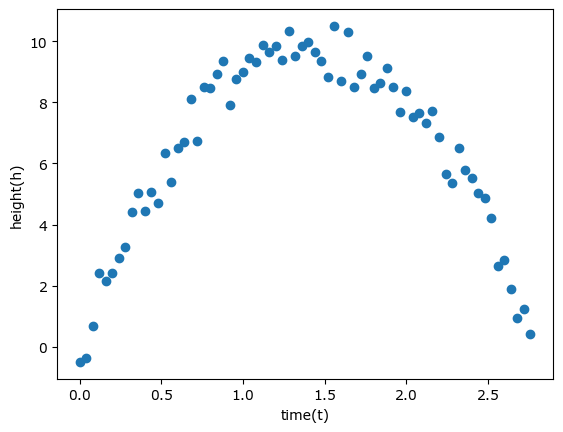

In [163]:
#plt.figure(figsize=(10,8))
plt.scatter(t, h)
plt.xlabel('time(t)')
plt.ylabel('height(h)')

### Preparing data for Batch Gradient Descent 

In [164]:
m = len(t)

t = np.concatenate([np.ones(m).reshape(m,1), t.reshape(len(t),1), t.reshape(len(t),1)**2], axis = 1)

In [165]:
w = np.ones(3)

In [166]:
np.dot(t,w).shape

(70,)

In [167]:
t.shape[1]

3

In [168]:

def costFunction(w, X, h):
    
    z = np.dot(X,w)
    J = 0.5/m * np.sum((z-h)**2)
    #grad = 1/m *(np.dot(X.T, z-h))
    
    return J

In [169]:
w = np.ones(t.shape[1])


In [170]:
costFunction(w,t,h)

11.637276603604013

In [171]:
epochs = 50000
α = 0.01
m = t.shape[0]
l = []

for epoch in range(epochs):
    z = np.dot(t,w)
    grad = 1/m *(np.dot(t.T, z-h))
    w = w - α *grad
    
    loss = costFunction(w,t,h)
    l.append(loss)
    

In [172]:
w

array([-0.13575301, 14.20039593, -5.04170006])

Text(0, 0.5, 'Loss, J(w)')

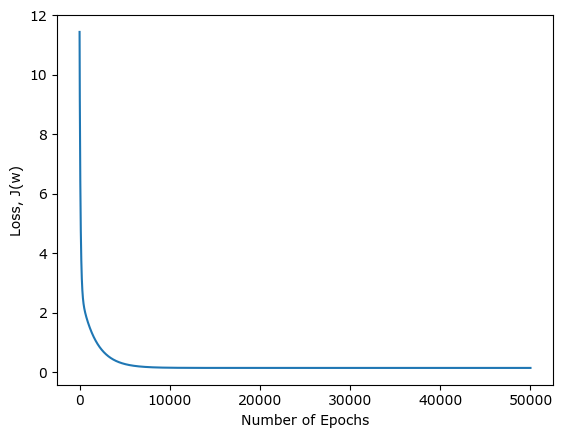

In [173]:
plt.plot(np.arange(1,len(l)+1,1),l)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")

In [174]:
print("Calculated Weights = ", w)
print("Loss = ", loss)

Calculated Weights =  [-0.13575301 14.20039593 -5.04170006]
Loss =  0.14205626028673415


In [175]:
def prediction(w):
    return(np.dot(t,w))



In [176]:
y_pred = prediction(w)

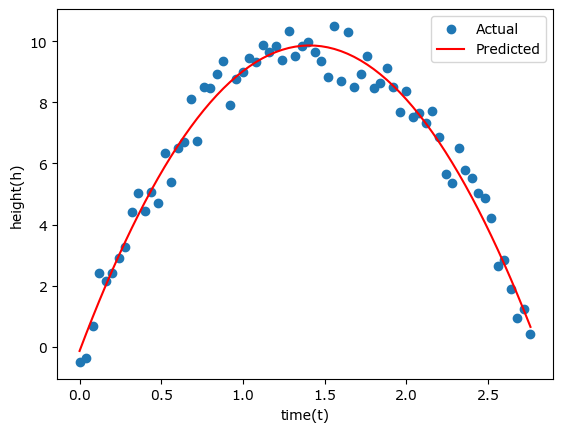

In [177]:
#plt.figure(figsize=(10,8))
plt.scatter(t[:,1:2], h, label='Actual')
plt.plot(t[:,1:2],y_pred, c='r',label='Predicted')
#plt.xscale('log')
plt.xlabel('time(t)')
plt.ylabel('height(h)')
plt.legend()

In [178]:
a = np.arange(1,50001,1)


# 3 Degree Polynomial

In [179]:
t = data[0]

In [180]:
m = len(t)

t = np.concatenate([np.ones(m).reshape(m,1), t.reshape(len(t),1), t.reshape(len(t),1)**2,t.reshape(len(t),1)**3], axis = 1)

In [181]:
w = np.ones(t.shape[1])

In [182]:
epochs = 50000
α = 0.01
m = t.shape[0]
l = []

for epoch in range(epochs):
    z = np.dot(t,w)
    grad = 1/m *(np.dot(t.T, z-h))
    w = w - α *grad
    
    loss = costFunction(w,t,h)
    l.append(loss)
    

Text(0, 0.5, 'Loss, J(w)')

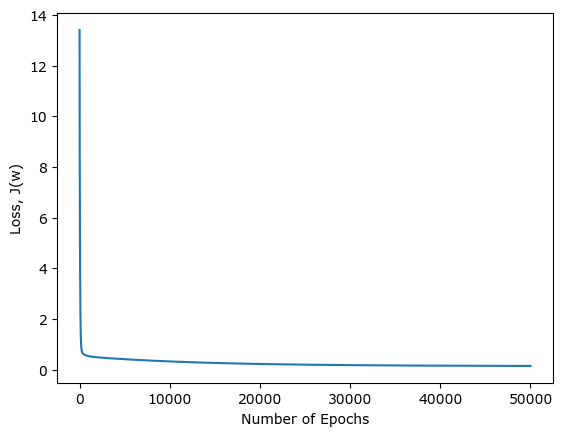

In [183]:
plt.plot(a,l)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")

In [184]:
print("Loss: ", loss)
print("Predicted Weights: ",w)

Loss:  0.14917332890505197
Predicted Weights:  [ 0.14766326 13.19184228 -4.23709154 -0.17776942]


In [185]:
y_pred = prediction(w)

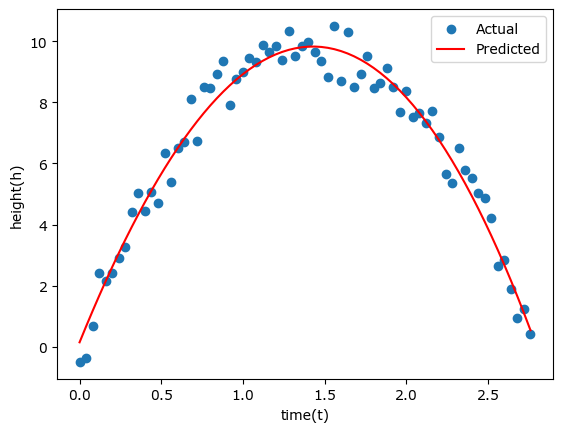

In [186]:
#plt.figure(figsize=(10,8))
plt.scatter(t[:,1:2], h, label = 'Actual')
plt.plot(t[:,1:2],y_pred, c='r', label='Predicted')
#plt.xscale('log')
plt.xlabel('time(t)')
plt.ylabel('height(h)')
plt.legend()

Loss is slightly more in 3 Degree Polynomial. Also, as we increase the degree of Polynomial, chances of overfitting may increase


# SGD

In [187]:
import random

**For 2 Degree Polynomial**

In [188]:
t = t[:,0:3]

In [189]:
t[4,:]

array([1.    , 0.16  , 0.0256])

In [190]:
def SGD(X, y_true, epochs, learning_rate):
 
    n = X.shape[1]
    
    w = np.ones(shape=(n)) 
    
    total_samples = X.shape[0]
    
    l = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) 
        sample_x = X[random_index,:]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(sample_x,w ) 
    
        w_grad = -(1/total_samples)*np.dot(sample_x.T,(sample_y-y_predicted))
       
        
        w = w - learning_rate * w_grad
        
        
        cost = 0.5*np.square(sample_y-y_predicted)
        
        if i%100==0: 
            l.append(cost)
            epoch_list.append(i)
        
    return w, cost, l, epoch_list



**For learning rate = 0.01:**

In [191]:
w,cost,l,epoch_list=0,0,0,0

In [192]:
w,cost,l,epoch_list= SGD(t,h,50000,0.01)

In [193]:
print("Learnt Weights: " ,w)

Learnt Weights:  [ 4.6396492   5.09067842 -1.95928984]


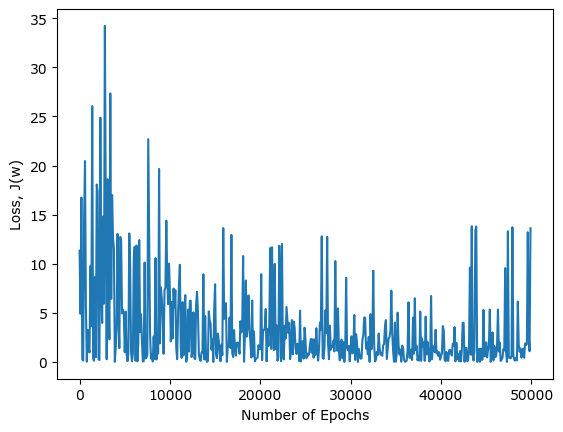

In [194]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")
plt.plot(epoch_list,l)

In [195]:
y_pred = prediction(w)

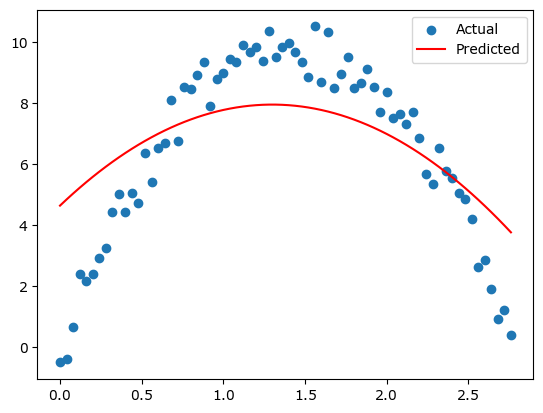

In [196]:
plt.scatter(t[:,1:2], h, label = "Actual")
plt.plot(t[:,1:2], y_pred, c = 'r', label = 'Predicted')
plt.legend()

**For Learning rate = 0.1**

In [197]:
w,cost,l,epoch_list=0,0,0,0
w,cost,l,epoch_list= SGD(t,h,50000,0.1)

Learnt Weights:  [ 0.58695903 12.90884398 -4.59786568]


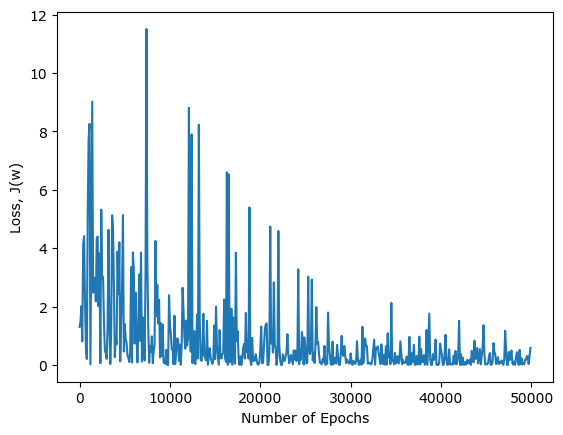

In [198]:
print("Learnt Weights: " ,w)

plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")
plt.plot(epoch_list,l)

y_pred = prediction(w)


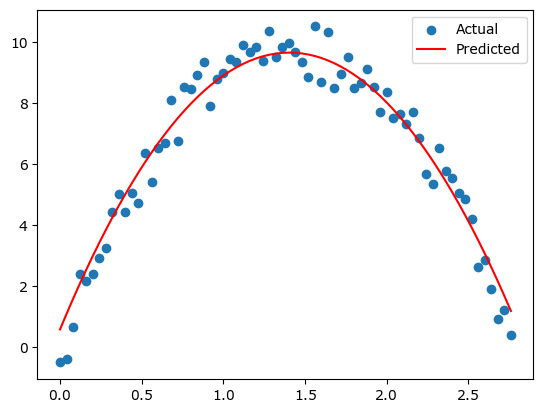

In [199]:

plt.scatter(t[:,1:2], h, label='Actual')
plt.plot(t[:,1:2], y_pred, c = 'r', label="Predicted")
plt.legend()

**Learning Rate = 0.5**

Learnt Weights:  [-0.14803436 14.21522639 -5.03755181]


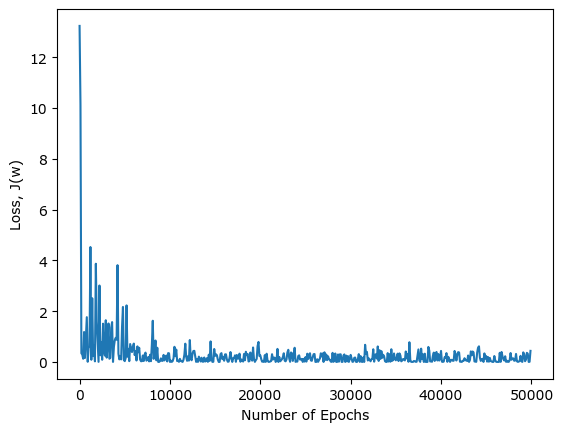

In [200]:
w,cost,l,epoch_list=0,0,0,0
w,cost,l,epoch_list= SGD(t,h,50000,0.5)

print("Learnt Weights: " ,w)

plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")
plt.plot(epoch_list,l)

y_pred = prediction(w)


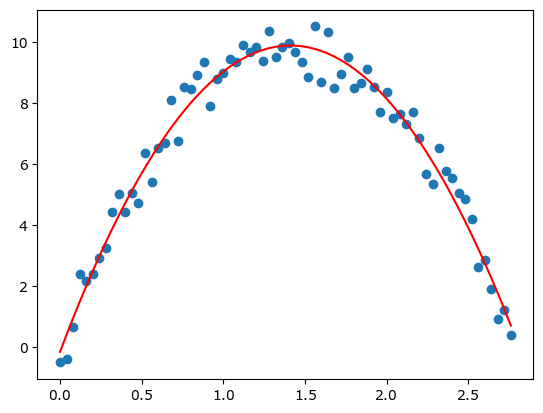

In [201]:

plt.scatter(t[:,1:2], h)
plt.plot(t[:,1:2], y_pred, c = 'r')

**For 3 Degree Polynomial**

In [202]:
t = data[0]
m = len(t)

t = np.concatenate([np.ones(m).reshape(m,1), t.reshape(len(t),1), t.reshape(len(t),1)**2,t.reshape(len(t),1)**3], axis = 1)
w = np.ones(t.shape[1])

**Learning Rate = 0.01**

Learnt Weights:  [ 3.08401659  4.00578381  2.70656675 -1.6631498 ]


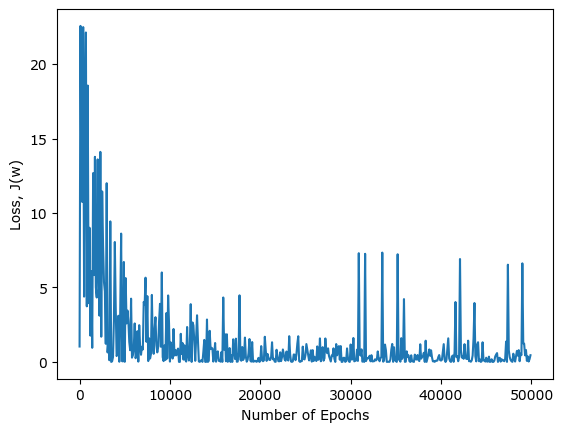

In [203]:
w,cost,l,epoch_list=0,0,0,0
w,cost,l,epoch_list= SGD(t,h,50000,0.01)
print("Learnt Weights: " ,w)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")
plt.plot(epoch_list,l)

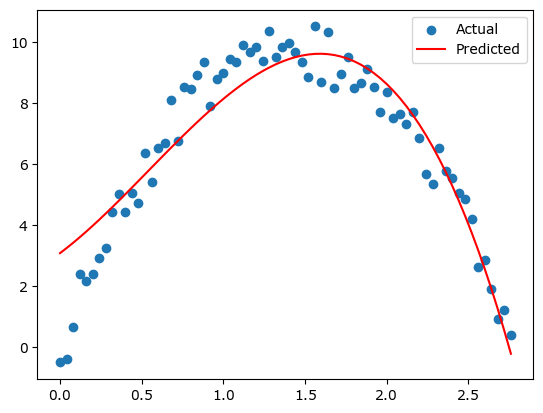

In [204]:
y_pred = prediction(w)
plt.scatter(t[:,1:2], h, label='Actual')
plt.plot(t[:,1:2], y_pred, c = 'r', label='Predicted')
plt.legend()

**For lr = 0.1**

Learnt Weights:  [ 1.88542536  6.60602085  1.26723295 -1.4126547 ]


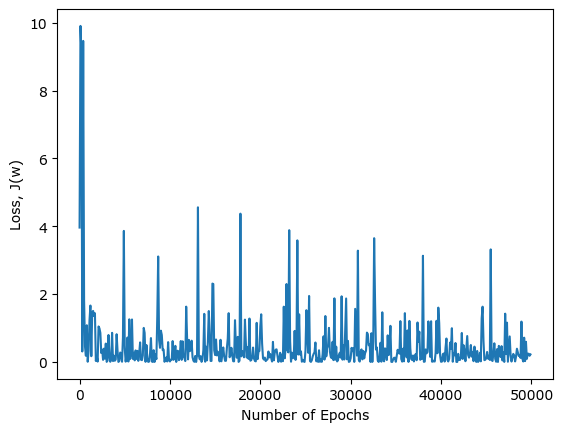

In [205]:
w = np.zeros(t.shape[1])
cost,l,epoch_list=0,0,0
w,cost,l,epoch_list= SGD(t,h,50000,0.1)
print("Learnt Weights: " ,w)

plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")
plt.plot(epoch_list,l)

y_pred = prediction(w)


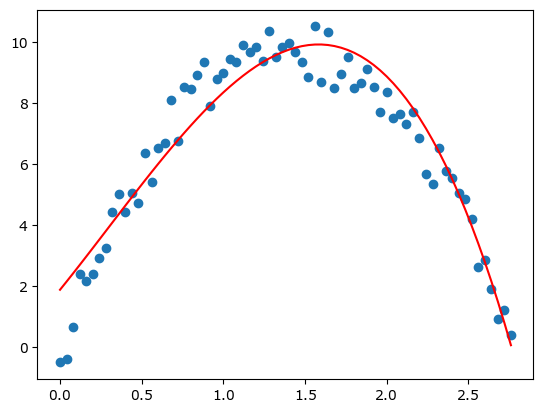

In [206]:

plt.scatter(t[:,1:2], h)
plt.plot(t[:,1:2], y_pred, c = 'r')

**lr = 0.5**

Learnt Weights:  [ 0.55431879 12.01456264 -3.22729504 -0.45765285]


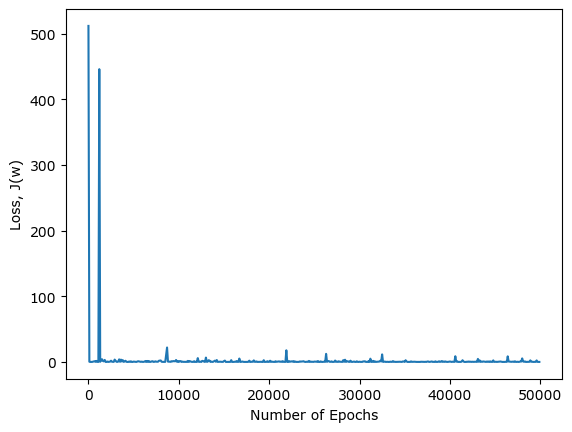

In [207]:
w = np.zeros(t.shape[1])
cost,l,epoch_list=0,0,0
w,cost,l,epoch_list= SGD(t,h,50000,0.5)

print("Learnt Weights: " ,w)

plt.xlabel("Number of Epochs")
plt.ylabel("Loss, J(w)")
plt.plot(epoch_list,l)

y_pred = prediction(w)


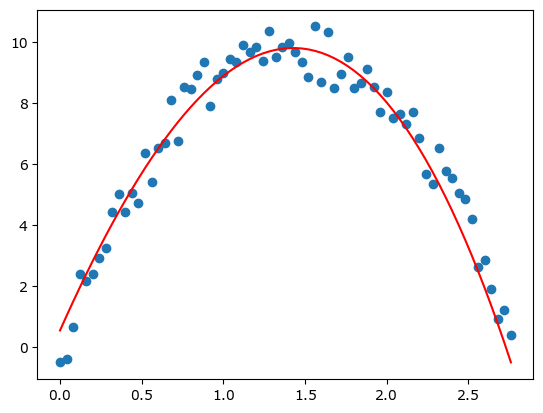

In [208]:

plt.scatter(t[:,1:2], h)
plt.plot(t[:,1:2], y_pred, c = 'r')

**Inference:**
For Stochastic Graident Descent, loss curve with number of epochs is fluctuating and not smooth because of the random nature of selection of data points.
Also, for larger learning rates, SGD converges faster. In fact the performance is better for alpha = 0.5 as compared to alpha = 0.01

# Different Learning Rates

In [209]:
t = t[:,0:3]

In [210]:
t = (t-t.min())/(t.max()-t.min())

In [211]:
epochs = 50000
α = 0.01
m = t.shape[0]
l = []
loss =0
w = np.ones(3)

for epoch in range(epochs):
    z = np.dot(t,w)
    grad = 1/m *(np.dot(t.T, z-h))
    w = w - α *grad
    
    loss = costFunction(w,t,h)
    l.append(loss)
    

In [212]:
w

array([ 34.60825618,  41.37922535, -15.99114884])

In [213]:
epochs = 50000
α = 0.1
m = len(t)
l1 = []
loss =0
w = np.ones(3)
for epoch in range(epochs):
    z = np.dot(t,w)
    grad = 1/m *(np.dot(t.T, z-h))
    w = w - α *grad
    
    loss = costFunction(w,t,h)
    l1.append(loss)
    

In [214]:
epochs = 50000
α = 0.5
m = len(t)
l2 = []
loss =0
w = np.random.randn(3)
for epoch in range(epochs):
    z = np.dot(t,w)
    grad = 1/m *(np.dot(t.T, z-h))
    w = w - α *grad
    
    loss = costFunction(w,t,h)
    l2.append(loss)
    

In [215]:
epochs = 50000
α = 0.05
m = len(t)
l3 = []
loss =0
w = np.ones(3)
for epoch in range(epochs):
    z = np.dot(t,w)
    grad = 1/m *(np.dot(t.T, z-h))
    w = w - α *grad
    
    loss = costFunction(w,t,h)
    l3.append(loss)
    

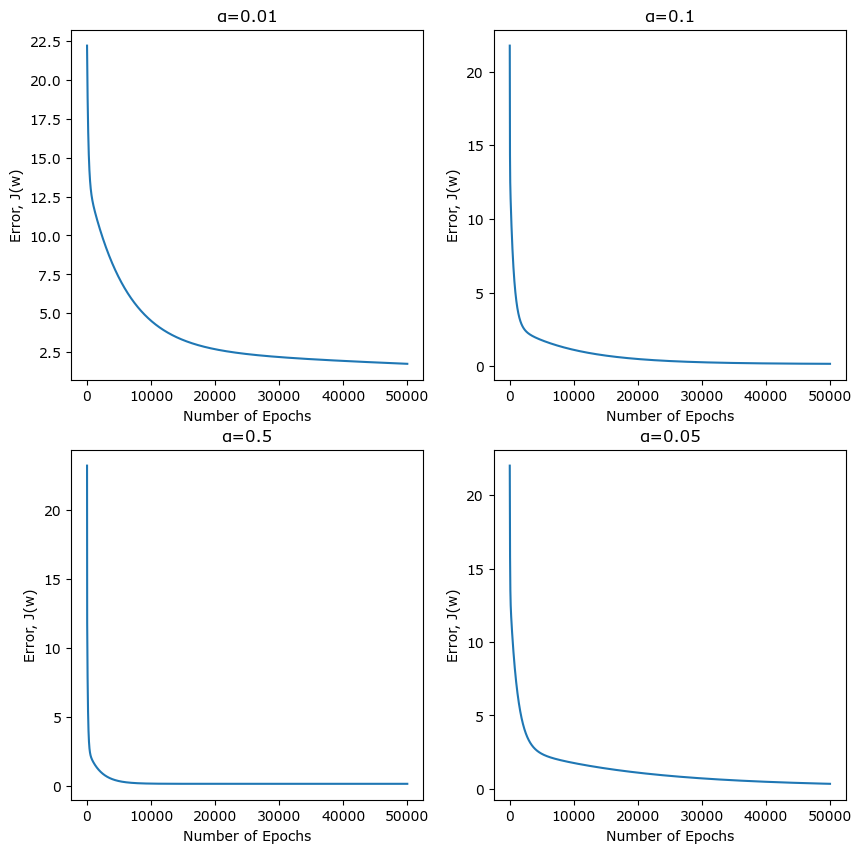

In [216]:

figure, axis = plt.subplots(2, 2, figsize=(10,10))
  

axis[0, 0].plot(a, l)
axis[0, 0].set_title("α=0.01")
  

axis[0, 1].plot(a, l1)
axis[0, 1].set_title("α=0.1")
  

axis[1, 0].plot(a, l2)
axis[1, 0].set_title("α=0.5")

axis[1, 1].plot(a, l3)
axis[1, 1].set_title("α=0.05")

for ax in axis.flat:
    ax.set(xlabel='Number of Epochs', ylabel='Error, J(w)')

## Variable learning rate

In [289]:

def costFunction(w):
    
    z = np.dot(t,w)
    J = 0.5/m * np.sum((z-h)**2)
    #grad = 1/m *(np.dot(X.T, z-h))
    
    return J


def grad(w):
    
    z = np.dot(t,w)
    J = 0.5/m * np.sum((z-h)**2)
    grad = 1/m *(np.dot(t.T, z-h))
    
    return grad

In [290]:
h = data[1]
t = data[0]

In [291]:
m = len(t)

t = np.concatenate([np.ones(m).reshape(m,1), t.reshape(len(t),1), t.reshape(len(t),1)**2], axis = 1)

In [292]:
def sec(t,h,w0):
    α0 = 0.01
    d0 = grad(w0)
    ϕ = costFunction(w0+α0*d0)
    ϕ_d = np.dot(grad(w0+α0*d0).T,d0)
    
    α = α0 - ϕ/ϕ_d
    
    while (abs(α-α0)<0.00001):
        if abs(α) <=0.2:
            α0 = α
        
            d = grad(w0)
            ϕ = costFunction(w0+α0*d)
            ϕ_d = np.dot(grad(w0+α0*d).T,d)
    
       
            α = α0 - ϕ/ϕ_d
        
        else:
            α = 0.1
    return(-α)
        
        

In [293]:
w0 = np.array([1,0.6,0.1])
sec(t,h,w0)

0.10052652056284224

In [294]:
epochs = 50000
α = 0.05
m = len(t)
l3 = []
loss =0
w = np.ones(3)
a = []
for epoch in range(epochs):
    z = np.dot(t,w)
    g = 1/m *(np.dot(t.T, z-h))
    w = w - α *g
    α = sec(t,h,w)
    loss = costFunction(w)
    a.append(α)
    l3.append(loss)
    

In [295]:
w

array([-0.11387785, 14.24403788, -4.94644835])

Text(0, 0.5, 'Cost, J(w)')

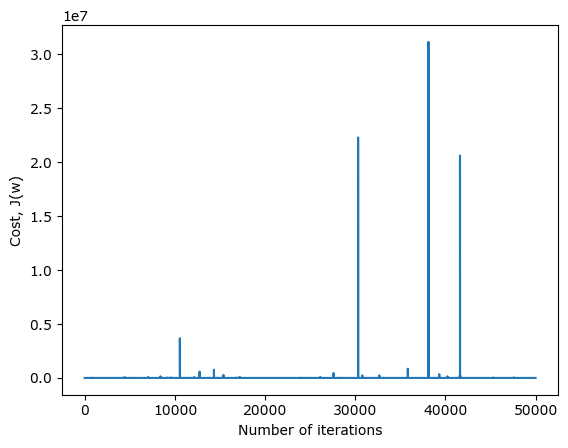

In [296]:
plt.plot(np.arange(1,len(l3)+1,1),l3)
plt.xlabel("Number of iterations")
plt.ylabel("Cost, J(w)")

In [297]:
y_pred = prediction(w)

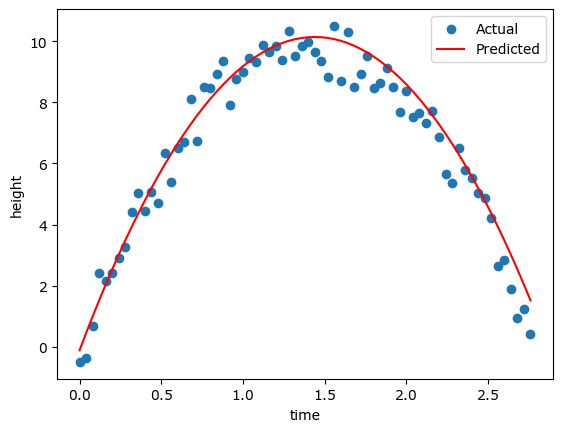

In [298]:
plt.scatter(t[:,1],h, label="Actual")
plt.plot(t[:,1], y_pred, c='r', label = "Predicted")
plt.xlabel("time")
plt.ylabel("height")
plt.legend()